In [1]:
import os
import json
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense, Dropout, Flatten  # Add Flatten here



In [2]:
import json
import os

# Path to metadata file
metadata_path = r'D:\ML\DeepFake_Detection\train_sample_videos\metadata.json'

# Load metadata
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Analyze metadata
real_videos = []
fake_videos = []

for video, details in metadata.items():
    if details['label'] == 'REAL':
        real_videos.append(video)
    else:
        fake_videos.append(video)

print(f"Number of real videos: {len(real_videos)}")
print(f"Number of fake videos: {len(fake_videos)}")


Number of real videos: 77
Number of fake videos: 323


In [3]:
import shutil

# Directory paths
video_dir = r'D:\ML\DeepFake_Detection\train_sample_videos'
real_dir = r'D:\ML\DeepFake_Detection\real_dir'
fake_dir = r'D:\ML\DeepFake_Detection\fake_dir'

# Create directories if not present
os.makedirs(real_dir, exist_ok=True)
os.makedirs(fake_dir, exist_ok=True)

# Move videos to respective directories
for video in real_videos:
    shutil.move(os.path.join(video_dir, video), os.path.join(real_dir, video))

for video in fake_videos:
    shutil.move(os.path.join(video_dir, video), os.path.join(fake_dir, video))


In [2]:
import pandas as pd

In [3]:
metadata_path = pd.read_json(r'D:\ML\DeepFake_Detection\train_sample_videos\metadata.json').T
metadata_path.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [7]:
%pip install opencv-python mtcnn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os
import cv2
from mtcnn import MTCNN

# Initialize the MTCNN face detector
detector = MTCNN()

# Define directories
real_dir = r'D:\ML\DeepFake_Detection\real_dir'
fake_dir = r'D:\ML\DeepFake_Detection\fake_dir'
output_real_dir = r'D:\ML\DeepFake_Detection\output_real_dir'
output_fake_dir = r'D:\ML\DeepFake_Detection\output_fake_dir'

# Create output directories if they don't exist
os.makedirs(output_real_dir, exist_ok=True)
os.makedirs(output_fake_dir, exist_ok=True)

def detect_and_extract_faces(video_path, output_dir, max_frames=20):
    """
    Detects and extracts faces from a video and saves them as images.
    Only processes up to a given number of frames (max_frames).
    
    Parameters:
    video_path (str): Path to the video file.
    output_dir (str): Directory to save the extracted face images.
    max_frames (int): Maximum number of frames to process per video.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Frame number to keep track of each frame
    frame_num = 0
    processed_frames = 0  # Keep track of how many frames we've processed
    
    while True:
        ret, frame = cap.read()
        if not ret or processed_frames >= max_frames:
            break  # Exit when video ends or when 20 frames are processed
            
        frame_num += 1
        processed_frames += 1  # Increment the number of processed frames
        
        # Detect faces in the current frame
        faces = detector.detect_faces(frame)
        
        for i, face in enumerate(faces):
            # Get bounding box for each detected face
            x, y, width, height = face['box']
            
            # Ensure bounding box doesn't go out of frame
            x, y = max(0, x), max(0, y)
            face_crop = frame[y:y+height, x:x+width]
            
            # Save face crop as an image file
            face_filename = os.path.join(output_dir, f"frame_{frame_num}_face_{i}.jpg")
            cv2.imwrite(face_filename, face_crop)
    
    # Release the video capture object
    cap.release()

def process_videos(video_dir, output_dir, max_frames=20):
    """
    Loops through all videos in a directory, detects and extracts faces from up to max_frames frames per video.
    
    Parameters:
    video_dir (str): Directory containing video files.
    output_dir (str): Directory to save extracted face images for all videos.
    max_frames (int): Maximum number of frames to process per video.
    """
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]  # Adjust extension if needed
    
    for video_file in video_files:
        video_path = os.path.join(video_dir, video_file)
        video_output_dir = os.path.join(output_dir, os.path.splitext(video_file)[0])
        
        # Create a directory for each video's extracted faces
        os.makedirs(video_output_dir, exist_ok=True)
        
        print(f"Processing {video_file}...")
        detect_and_extract_faces(video_path, video_output_dir, max_frames=max_frames)

# Process real and fake videos, limiting to 20 frames per video
process_videos(real_dir, output_real_dir, max_frames=20)
process_videos(fake_dir, output_fake_dir, max_frames=20)

print("Face detection and extraction complete.")


Processing abarnvbtwb.mp4...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
# Import relevant modules
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight
import numpy as np


In [1]:
# Define paths
real_dir = r'D:\ML\DeepFake_Detection\Combined_output_dir\output_real_dir'
fake_dir = r'D:\ML\DeepFake_Detection\Combined_output_dir\output_fake_dir'

# Parameters
img_height, img_width = 224, 224
batch_size = 32
epochs = 20
num_classes = 2  # Real and Fake


In [4]:
# Create data generators for loading the images and applying some augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Using 20% of the data for validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    directory='Combined_output_dir',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Because we have two classes: real and fake
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory='Combined_output_dir',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)


Found 6571 images belonging to 2 classes.
Found 1641 images belonging to 2 classes.


In [5]:
# Load the VGG16 model with ImageNet weights, excluding the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers (you can unfreeze later for fine-tuning)
for layer in base_model.layers:
    layer.trainable = False


In [44]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

# Load the VGG16 model with ImageNet weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers (so they are not trainable initially)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling instead of flattening
x = BatchNormalization()(x)      # Batch normalization
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)  # Fully connected layer with L2 regularization
x = Dropout(0.5)(x)              # Dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax for classification
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [45]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_vgg16_deepfake_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [46]:
# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# # Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2352s 11s/step - accuracy: 0.7423 - loss: 1.0448 - val_accuracy: 0.7898 - val_loss: 1.1307 - learning_rate: 1.0000e-05
Epoch 2/20
  1/205 ━━━━━━━━━━━━━━━━━━━━ 32:14 9s/step - accuracy: 0.8125 - loss: 1.0390

c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


205/205 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8125 - loss: 0.5221 - val_accuracy: 0.7778 - val_loss: 0.5634 - learning_rate: 1.0000e-05
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2234s 11s/step - accuracy: 0.8808 - loss: 0.8088 - val_accuracy: 0.8572 - val_loss: 0.8988 - learning_rate: 1.0000e-05
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9688 - loss: 0.3489 - val_accuracy: 1.0000 - val_loss: 0.3486 - learning_rate: 1.0000e-05
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1643s 8s/step - accuracy: 0.9171 - loss: 0.7329 - val_accuracy: 0.8505 - val_loss: 0.8947 - learning_rate: 1.0000e-05
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8750 - loss: 0.4283 - val_accuracy: 0.8889 - val_loss: 0.4447 - learning_rate: 1.0000e-05


In [47]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Generate classification report and confusion matrix
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Real', 'Fake']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


52/52 ━━━━━━━━━━━━━━━━━━━━ 324s 6s/step - accuracy: 0.8649 - loss: 0.8885
Validation Loss: 0.8990437984466553
Validation Accuracy: 0.8598415851593018
52/52 ━━━━━━━━━━━━━━━━━━━━ 308s 6s/step
Confusion Matrix
[[1194  115]
 [ 305   27]]
Classification Report
              precision    recall  f1-score   support

        Real       0.80      0.91      0.85      1309
        Fake       0.19      0.08      0.11       332

    accuracy                           0.74      1641
   macro avg       0.49      0.50      0.48      1641
weighted avg       0.67      0.74      0.70      1641



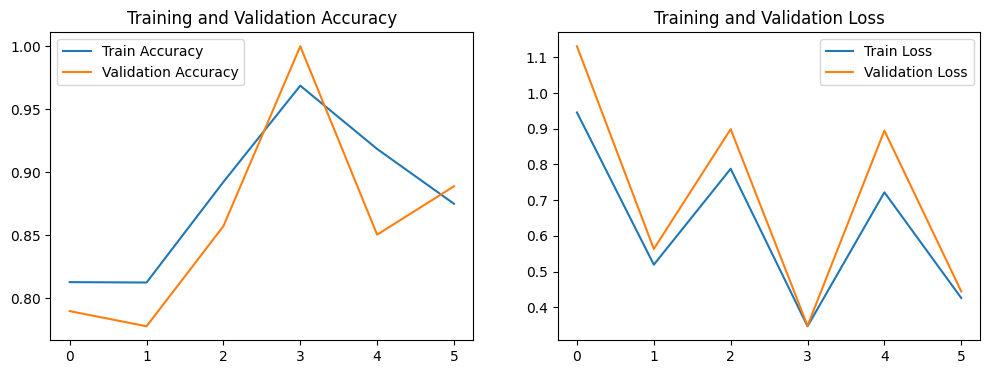

In [48]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [49]:
# Save the trained model
model.save('deepfake_detection_model.h5')
print('Model saved as deepfake_detection_model.h5')

Model saved as deepfake_detection_model.h5


In [6]:
import numpy as np
import cv2
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from mtcnn import MTCNN

# Load the trained VGG16 model
model = load_model(r'D:\ML\DeepFake_Detection\deepfake_detection_model.h5')

# MTCNN for face detection
detector = MTCNN()

# Function to detect and extract faces from the image
def extract_face(img):
    # Detect faces in the image
    faces = detector.detect_faces(img)
    if len(faces) == 0:
        print("No face detected.")
        return None
    # Extract the bounding box of the first face detected
    x, y, width, height = faces[0]['box']
    face = img[y:y+height, x:x+width]
    return face

# Function to predict if the face is real or fake
def predict_real_or_fake(img_path):
    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        print("Image not found.")
        return

    # Detect and extract face
    face = extract_face(img)
    if face is None:
        return

    # Resize face to 224x224 pixels (VGG16 input size)
    face_resized = cv2.resize(face, (224, 224))

    # Preprocess the face image
    face_array = image.img_to_array(face_resized)
    face_array = np.expand_dims(face_array, axis=0)
    face_array = preprocess_input(face_array)

    # Predict using the trained model
    prediction = model.predict(face_array)

    # Check prediction result (assuming the model outputs a single value: 0 for real, 1 for fake)
    if prediction[0][0] >= 0.5:
        print("The image is FAKE.")
    else:
        print("The image is REAL.")

# Test the function on a new image
img_path = r'D:\ML\DeepFake_Detection\avatar-female-white-26-35-1692637540-tumb-500.jpg'
predict_real_or_fake(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
The image is FAKE.


In [12]:
import cv2
import numpy as np
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from mtcnn import MTCNN

# Load the trained model
model = load_model(r'D:\ML\DeepFake_Detection\deepfake_detection_model.h5')

# MTCNN for face detection
detector = MTCNN()

# Function to extract and preprocess face from a video frame
def extract_and_preprocess_face(frame):
    # Detect faces in the frame
    faces = detector.detect_faces(frame)
    if len(faces) == 0:
        return None
    
    # Extract the bounding box of the first face detected
    x, y, width, height = faces[0]['box']
    face = frame[y:y+height, x:x+width]
    
    # Resize the face to 224x224 pixels (VGG16 input size)
    face_resized = cv2.resize(face, (224, 224))
    
    # Preprocess the face image
    face_array = image.img_to_array(face_resized)
    face_array = np.expand_dims(face_array, axis=0)
    face_array = preprocess_input(face_array)
    
    return face_array

# Function to predict fake probability for a frame
def predict_fake_probability(frame):
    # Extract and preprocess the face
    face_array = extract_and_preprocess_face(frame)
    if face_array is None:
        print("No face detected in the frame.")
        return 0.5  # Default to 0.5 if no face is detected
    
    # Predict using the trained model
    prediction = model.predict(face_array)
    return prediction[0][0]

# Function to process the video and predict real or fake
def process_video(video_path):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)
    
    frame_count = 0
    fake_scores = []

    while True:
        # Read frame-by-frame
        ret, frame = video_capture.read()
        if not ret:
            break  # Exit loop when the video ends
        
        # Process every nth frame to save time (you can adjust `n`)
        frame_count += 1
        if frame_count % 10 == 0:  # Process every 10th frame
            fake_prob = predict_fake_probability(frame)
            fake_scores.append(fake_prob)
        
    # Release the video capture object
    video_capture.release()
    
    if len(fake_scores) == 0:
        return 0.5  # Default to 0.5 if no frames were processed
    
    # Return the average fake probability over all processed frames
    avg_fake_score = np.mean(fake_scores)
    return avg_fake_score

# Test the video processing function
video_path = r'D:\ML\DeepFake_Detection\fake_dir\esgftaficx.mp4'
fake_prob = process_video(video_path)

if fake_prob >= 0.5:
    print(f"The video is FAKE with a confidence of {fake_prob:.2f}.")
else:
    print(f"The video is REAL with a confidence of {1 - fake_prob:.2f}.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━